# FGNET-LOPO EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Manipulation

In [2]:
df_fgnet_lopo = pd.read_csv("data/FGNet-LOPO.csv")
df_fgnet_lopo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Columns: 112 entries, b1 to Gender_0M_1F
dtypes: float64(109), int64(3)
memory usage: 876.9 KB


In [3]:
df_fgnet_lopo.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,b103,b104,b105,b106,b107,b108,b109,age,ID,Gender_0M_1F
0,0.585770,-0.075982,-0.276594,0.076490,0.189404,-0.152451,0.003264,-0.366677,0.148862,-0.078316,...,-0.007170,0.012785,0.014379,-0.032976,-0.005910,0.015997,-0.002833,5,1,0
1,0.117512,-0.344377,0.413923,-0.088210,0.152117,-0.020675,-0.085257,-0.122578,0.085524,-0.035403,...,-0.024755,0.006724,0.014217,0.001321,-0.005616,-0.018197,-0.000073,8,1,0
2,0.248636,-0.209122,0.516829,-0.124100,-0.002087,0.165375,-0.033023,0.035212,0.156937,-0.028065,...,-0.035687,0.023377,0.028616,-0.009582,-0.020722,0.003676,-0.015716,10,1,0
3,0.136742,-0.095098,0.428192,-0.125278,-0.117103,0.080187,0.109120,-0.068001,0.185257,-0.001298,...,0.020454,0.021750,0.006348,-0.006021,-0.005336,0.002317,-0.014843,14,1,0
4,-0.371003,-0.164112,0.431468,-0.163736,-0.217533,0.083152,-0.053181,-0.169808,0.178207,-0.000211,...,0.007863,0.008738,0.002282,-0.021130,-0.009988,-0.016178,-0.003646,16,1,0


In [4]:
df_fgnet_lopo.columns

Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       ...
       'b103', 'b104', 'b105', 'b106', 'b107', 'b108', 'b109', 'age', 'ID',
       'Gender_0M_1F'],
      dtype='object', length=112)

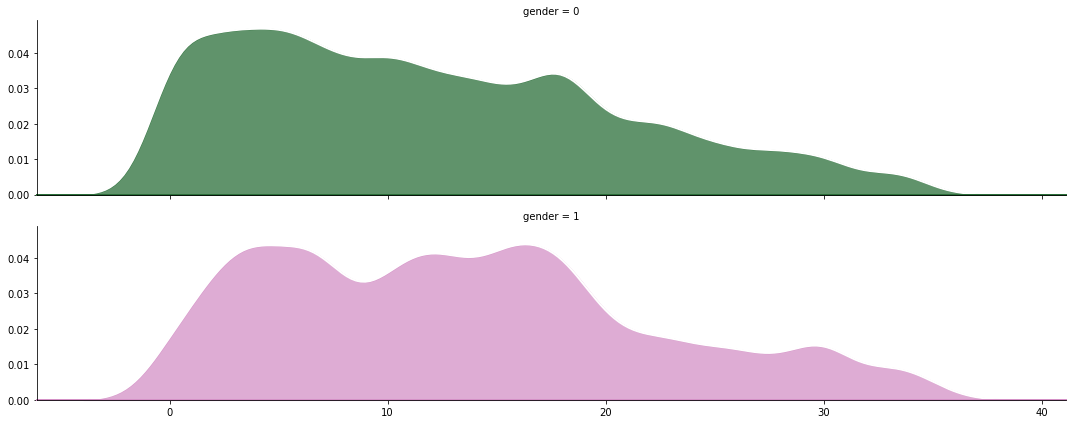

In [5]:
age_gender = df_fgnet_lopo[['age','Gender_0M_1F']].rename(columns={'Gender_0M_1F': 'gender'}).sort_values(by='age')[:-100]
age_gender['gender'] = age_gender['gender']

fg = sns.FacetGrid(age_gender, row='gender', hue='gender', aspect=5, palette='cubehelix')
fg.map(sns.kdeplot, 'age', bw_adjust=.5, clip_on=False, fill=True, alpha=.75, linewidth=1.5)
fg.map(sns.kdeplot, 'age', clip_on=False, color='w', lw=2, bw_adjust=.5)
fg.map(plt.axhline, y=0, lw=2, clip_on=False)

In [6]:
X = df_fgnet_lopo.drop(['age','ID','Gender_0M_1F'], axis=1)
y = df_fgnet_lopo[['age','ID','Gender_0M_1F']]

In [7]:
X.columns

Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10',
       ...
       'b100', 'b101', 'b102', 'b103', 'b104', 'b105', 'b106', 'b107', 'b108',
       'b109'],
      dtype='object', length=109)

In [8]:
y.columns

Index(['age', 'ID', 'Gender_0M_1F'], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [10]:
print(X.shape)
print(X_train.shape)
print(X_test.shape[0] / X.shape[0])

(1002, 109)
(801, 109)
0.20059880239520958


In [11]:
print(f'X: {X.shape} | X_train: {X_train.shape} | X_test: {X_test.shape}')
print(f'y: {y.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}')

X: (1002, 109) | X_train: (801, 109) | X_test: (201, 109)
y: (1002, 3) | y_train: (801, 3) | y_test: (201, 3)


### PCA

In [12]:
from sklearn.decomposition import PCA

lopo_pca = PCA(n_components=3)
lopo_pca.fit(X)

df_pca = pd.concat({
    'X': pd.DataFrame(lopo_pca.transform(X), columns=['PC1', 'PC2', 'PC3']),
    'X_train': pd.DataFrame(lopo_pca.transform(X_train), columns=['PC1', 'PC2', 'PC3']),
    'X_test': pd.DataFrame(lopo_pca.transform(X_test), columns=['PC1', 'PC2', 'PC3']),
}, axis=0)
df_pca

PC1       PC2       PC3
X      0    0.585492 -0.068204 -0.274003
       1    0.119893 -0.351934  0.403403
       2    0.250850 -0.217578  0.505914
       3    0.138149 -0.102591  0.419126
       4   -0.369514 -0.173921  0.419965
...              ...       ...       ...
X_test 196 -0.369514 -0.173921  0.419965
       197  1.345986 -0.069989  0.007850
       198 -0.144766  0.817860 -0.234692
       199 -0.016290  0.226374 -0.264630
       200  0.147275 -0.172847  0.070667

[2004 rows x 3 columns]

In [13]:
df_pca.loc['X',:]['PC1']

0       0.585492
1       0.119893
2       0.250850
3       0.138149
4      -0.369514
          ...   
997    -0.098102
998    -1.231202
999    -0.300253
1000   -1.651637
1001   -1.020738
Name: PC1, Length: 1002, dtype: float64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

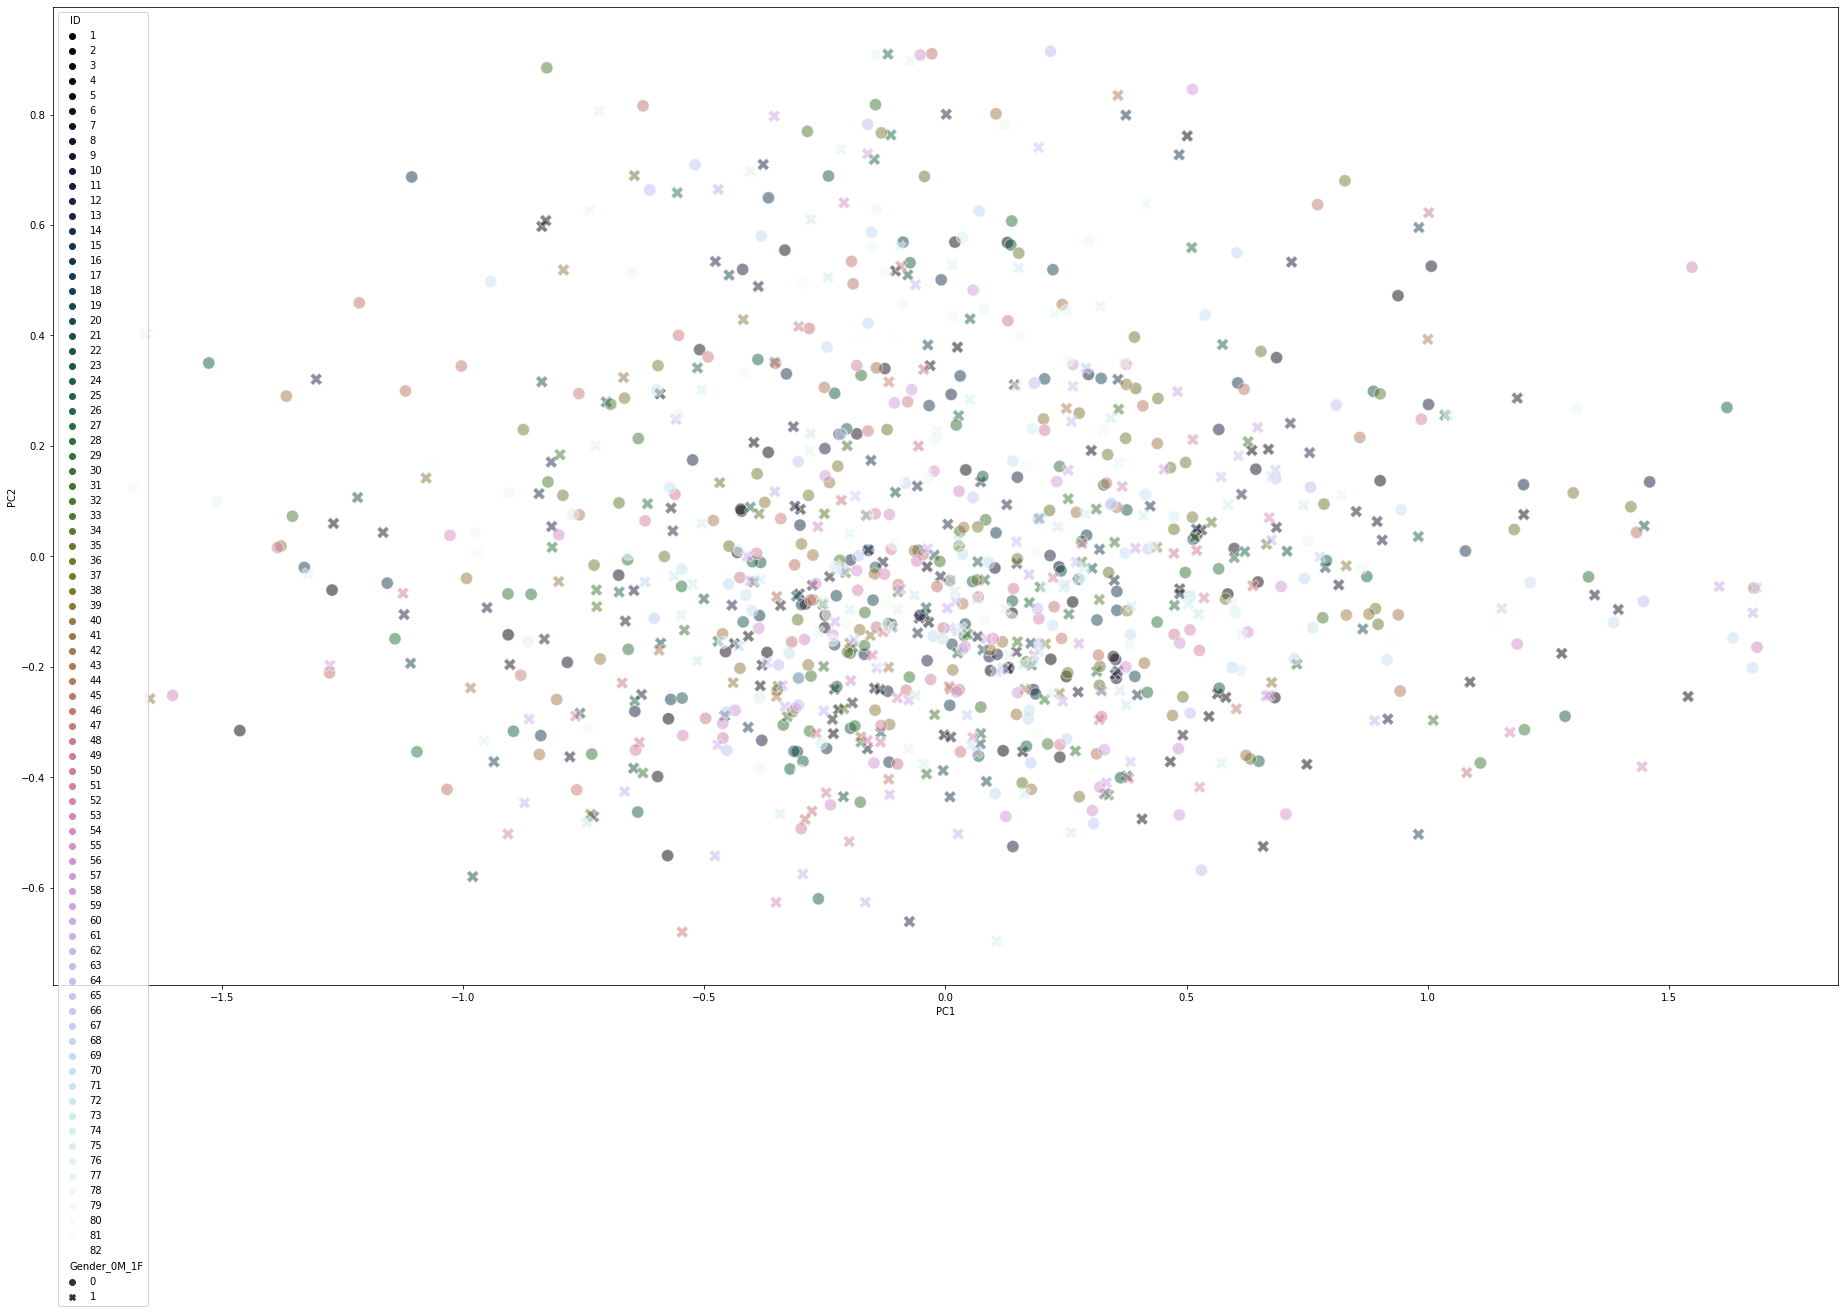

In [14]:
plt.figure(figsize=(32,18))
sns.scatterplot(x=df_pca.loc['X',:]['PC1'],
                y=df_pca.loc['X',:]['PC2'],
                hue=y['ID'], 
                style=y['Gender_0M_1F'],
                palette='cubehelix',
                legend='full',
                s=150,
                alpha=.5)

## Classifiers

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, KBinsDiscretizer, OneHotEncoder

RANDOM_STATE = 42

### Linear Models
#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression(random_state=RANDOM_STATE)
clf_logreg.fit(X_train, y_train['Gender_0M_1F'])

LogisticRegression(random_state=42)

In [31]:
clf_logreg_pred = clf_logreg.predict(X_test)
clf_logreg_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [32]:
clf_logreg.score(X_test, y_test['Gender_0M_1F'])

0.7860696517412935

In [33]:
clf_logreg.score(X_train, y_train['Gender_0M_1F'])

0.8077403245942572

In [34]:
print(confusion_matrix(y_test['Gender_0M_1F'], clf_logreg_pred))
print(classification_report(y_test['Gender_0M_1F'], clf_logreg_pred))

[[87 11]
 [32 71]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        98
           1       0.87      0.69      0.77       103

    accuracy                           0.79       201
   macro avg       0.80      0.79      0.78       201
weighted avg       0.80      0.79      0.78       201



In [ ]:
clf_logreg_gscv = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE),
    param_grid={
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l1', 'l2']
    },
    n_jobs=6,
)
clf_logreg_gscv.fit(X_train, y_train)

print(f'Best Params: {clf_logreg_gscv.best_params_}\nBest Score: {clf_logreg_gscv.best_score_}')


#### Ridge Classifier

#### SGD Classifier

### LDA/QDA

### SVM

### KNN/K-Means

### Voting Classifiers

## Regressors

### Linear Models
#### Linear Regression

#### Ridge Regression

#### SGD Regressor

### LDA/QDA


### SVM

### KNN/K-Means Regression

### Voting Regressors